Imports and Global Variables

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.readwrite import json_graph
import json

MATRIX_SIZE = 10
NO_FG_NODES = 20
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
WEIGHT_BG_EDGES = 4
WEIGHT_FG_EDGES = 24
FIG_SIZE = (12, 12)

Task 1

In [ ]:
bg_node_coordinates = [(i,j) for i in range(MATRIX_SIZE) for j in range(MATRIX_SIZE)]

G = nx.Graph()
G.add_nodes_from(bg_node_coordinates, size=SIZE_BG_NODES, color = COLOR_BG, node_type = "bg")
matrix_dimensions = dict((n, n) for n in G.nodes())

node_sizes = [size[1] for size in G.nodes(data="size")]
node_colors = [color[1] for color in G.nodes(data="color")]

plt.figure(figsize=FIG_SIZE)
nx.draw(G, pos=matrix_dimensions, node_size=node_sizes, node_color=node_colors)

Task 2

In [ ]:
border = [n for n in bg_node_coordinates if n[0] == 0 or n[0] == MATRIX_SIZE - 1 or n[1] == 0 or n[1] == MATRIX_SIZE - 1]

fg_node_coordinates = random.sample([n for n in G if n not in border], NO_FG_NODES)
bg_node_coordinates = [bg_node for bg_node in bg_node_coordinates if bg_node not in fg_node_coordinates]

G.add_nodes_from(fg_node_coordinates, size=SIZE_FG_NODES, color=COLOR_FG, node_type = 'fg')

node_sizes = [size[1] for size in G.nodes(data="size")]
node_colors = [color[1] for color in G.nodes(data="color")]

plt.figure(figsize=FIG_SIZE)
nx.draw(G, pos=matrix_dimensions, node_size=node_sizes, node_color=node_colors)

Task 3

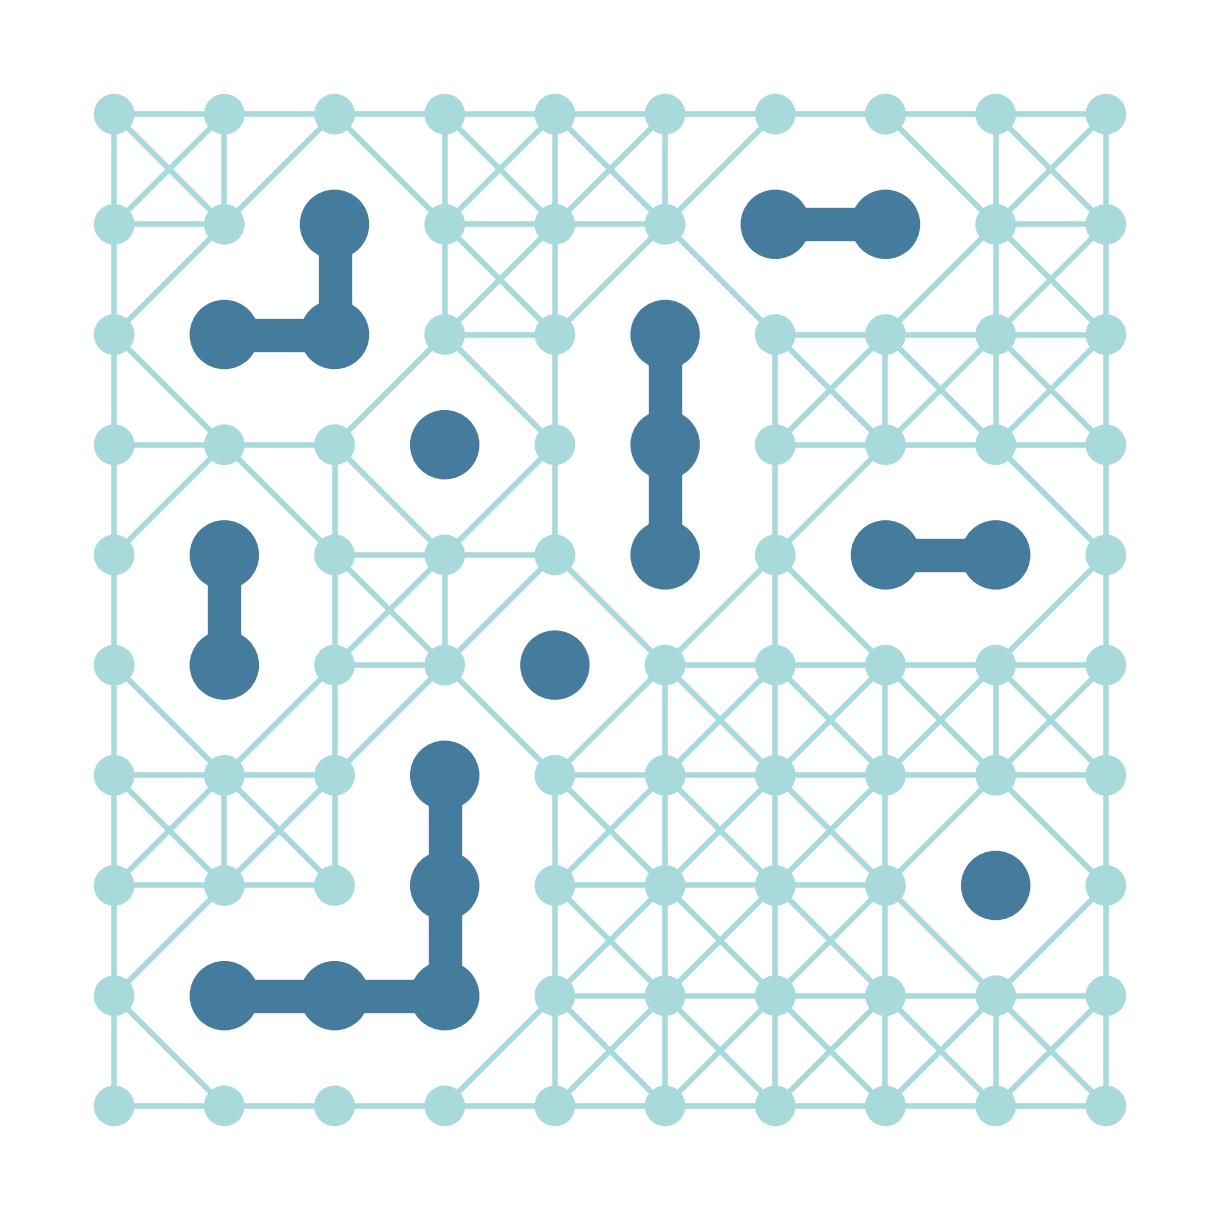

In [20]:
bg_edges = []
for bg_node in bg_node_coordinates:
    x,y = bg_node
    surrounding_nodes = [(x,y+1), (x,y-1), (x+1,y), (x-1,y), (x-1,y+1), (x+1,y-1), (x+1,y+1), (x-1,y-1)]
    surrounding_nodes = [s_node for s_node in surrounding_nodes if s_node in bg_node_coordinates]
    for s_node in surrounding_nodes:
        bg_edges.append((bg_node, s_node))

fg_edges = []
for fg_node in fg_node_coordinates:
    x,y = fg_node
    surrounding_nodes = [(x,y+1), (x,y-1), (x+1,y), (x-1,y)]
    surrounding_nodes = [s_node for s_node in surrounding_nodes if s_node in fg_node_coordinates]
    for s_node in surrounding_nodes:
        fg_edges.append((fg_node, s_node))

G.add_edges_from(bg_edges, width=WEIGHT_BG_EDGES, color=COLOR_BG)
G.add_edges_from(fg_edges, width=WEIGHT_FG_EDGES, color=COLOR_FG)

node_sizes = [size[1] for size in G.nodes(data="size")]
node_colors = [color[1] for color in G.nodes(data="color")]

edge_weights = [weight[2] for weight in G.edges(data='width')]
edge_colors = [color[2] for color in G.edges(data='color')]

plt.figure(figsize=FIG_SIZE)
nx.draw(G, pos=matrix_dimensions, node_size=node_sizes, node_color=node_colors, width=edge_weights, edge_color=edge_colors)


Task 4

In [ ]:
print("Graph analysis for background nodes")
print("Graph Info: {}".format(nx.info(G)))
print("Graph Density: {}".format(nx.density(G)))
print("Graph centrality for each node: \n {}".format(nx.degree_centrality(G)))

Task 5

In [ ]:
with open('activity2_network_data.json', 'w') as f:
    f.write(json.dumps(json_graph.node_link_data(G), indent=2))